In [3]:
# Core libraries for data manipulation and math
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# SciKit-Learn
from sklearn.model_selection import train_test_split

# --- Notebook Setup ---
%matplotlib inline

# Set styles for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Default plot size

### --- 1. Problem Definition ---
Goal: Predict house SalePrice (Regression problem)
Metric: Root Mean Squared Logarithmic Error (RMSLE)

In [4]:
# --- 2. Load Data ---
try:
    train_df = pd.read_csv('../data/train.csv')
    test_df = pd.read_csv('../data/test.csv')
except FileNotFoundError:
    print("Error: Data files not found. Make sure 'train.csv' and 'test.csv' are in a 'data' folder parallel to 'notebooks/'.")

# Display the first 5 rows to verify
print("Training Data Head:")
display(train_df.head())

print("\nTest Data Head:")
display(test_df.head())

print(f"\nTraining data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training Data Head:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Test Data Head:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal



Training data shape: (1460, 81)
Test data shape: (1459, 80)


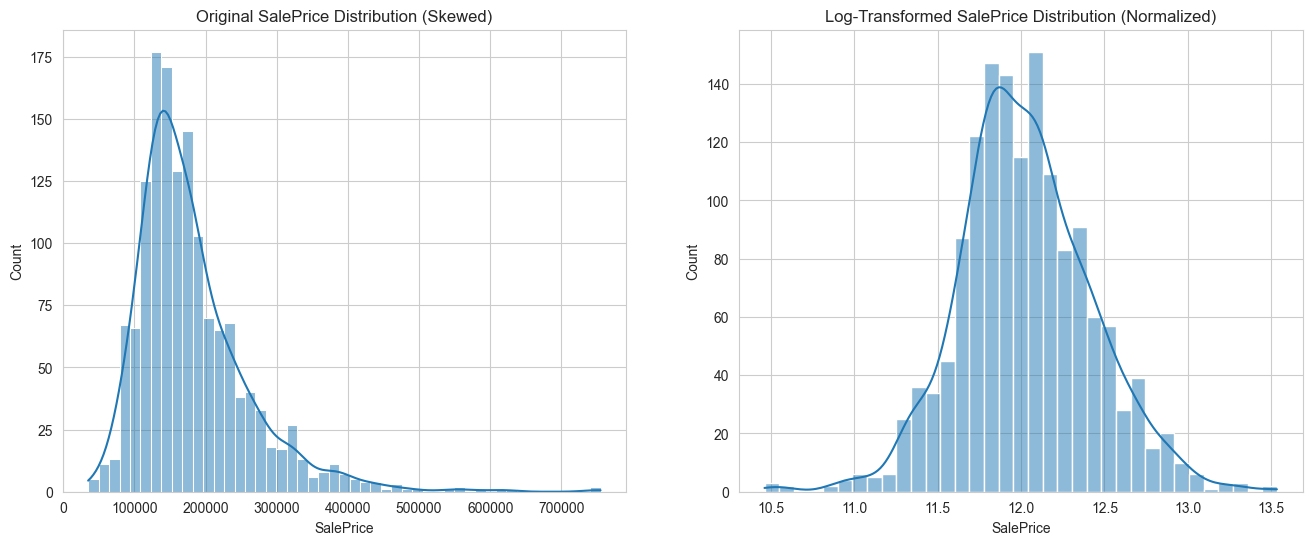

Applied log-transform (np.log1p) to 'SalePrice' in the training data.


In [5]:
# --- 3. Analyze the Target Variable (SalePrice) ---

# Set up a figure with two plots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original SalePrice (Histogram)
sns.histplot(train_df['SalePrice'], kde=True, ax=ax1)
ax1.set_title('Original SalePrice Distribution (Skewed)')

# Plot 2: Log-Transformed SalePrice (Histogram)
# np.log1p(x) is log(1 + x), which avoids errors if x is 0
log_saleprice = np.log1p(train_df['SalePrice'])
sns.histplot(log_saleprice, kde=True, ax=ax2)
ax2.set_title('Log-Transformed SalePrice Distribution (Normalized)')

plt.show()


train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
print("Applied log-transform (np.log1p) to 'SalePrice' in the training data.")

In [6]:
train_df['SalePrice']


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [7]:
# --- 4. ID Management ---
# Save the Test IDs for submission, then drop the column
# We already saved train_ID, but let's be explicit with test_ID
try:
    train_ID = train_df['Id']
    test_ID = test_df['Id']
    train_df = train_df.drop('Id', axis=1)
    test_df = test_df.drop('Id', axis=1)
    print("Dropped 'Id' columns from training and test dataframes.")
    print(f"Saved {len(test_ID)} test IDs for final submission.")
except KeyError:
    print("'Id' columns already handled.")

Dropped 'Id' columns from training and test dataframes.
Saved 1459 test IDs for final submission.


In [8]:
# Get lists of numerical and categorical feature names
# We exclude 'SalePrice' from the numerical list (it's our target)
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('SalePrice')

categorical_features = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Found {len(numerical_features)} numerical features.")
print(f"Found {len(categorical_features)} categorical features.")

Found 36 numerical features.
Found 43 categorical features.


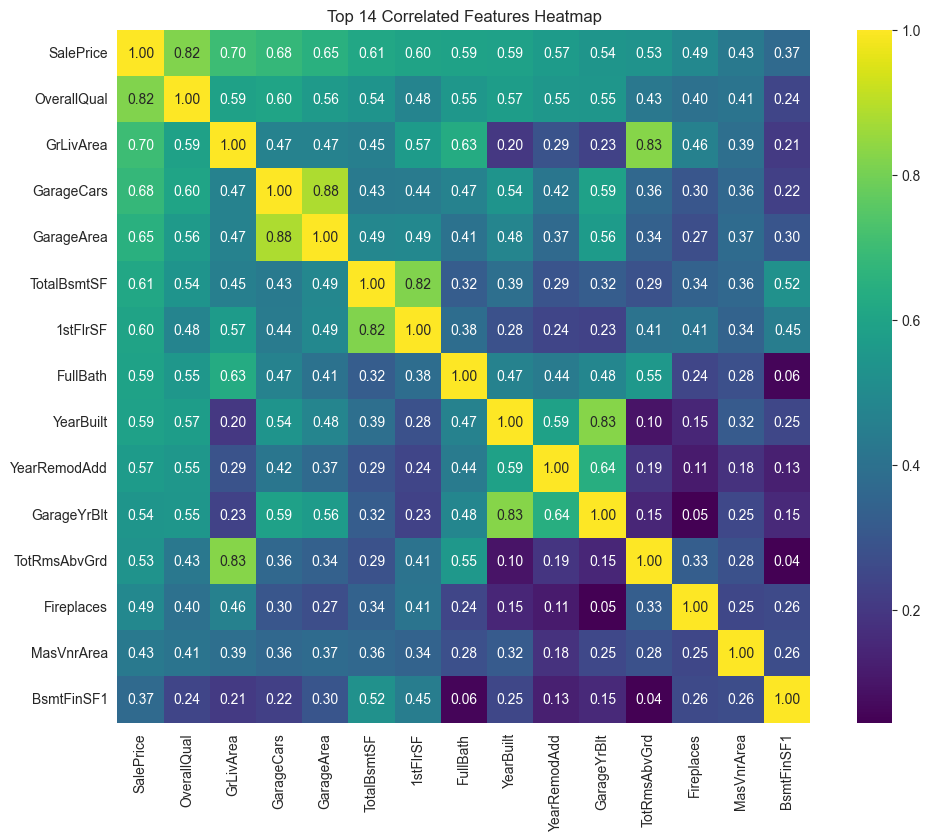

In [9]:
# --- 5. Numerical Feature Analysis ---

# Create a correlation matrix
# We include SalePrice here because it's what we want to correlate against
correlation_matrix = train_df.corr(numeric_only=True)

# Get the top 15 features most correlated with SalePrice
k = 15 # Number of features to show
top_cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
top_corr_matrix = train_df[top_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(top_corr_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={'size': 10}, square=True)
plt.title(f'Top {k-1} Correlated Features Heatmap')
plt.show()

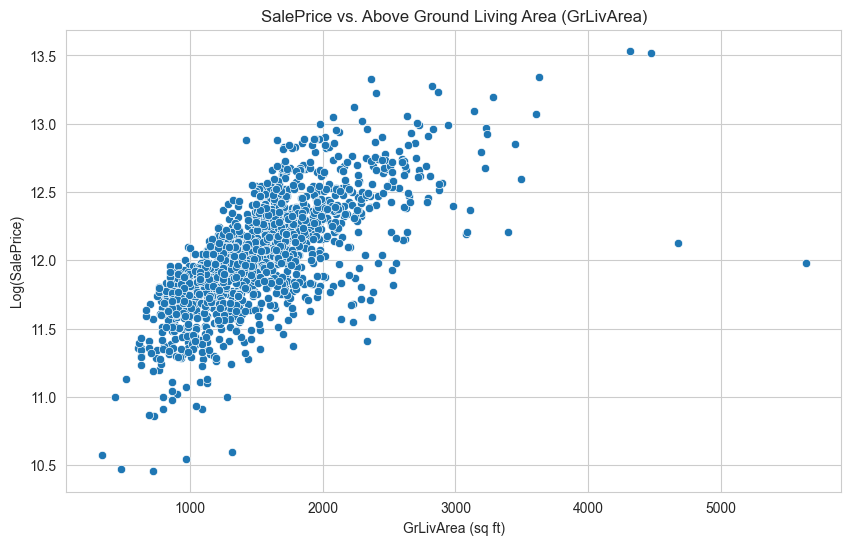

In [10]:
# --- 6. Deep Dive & Outlier Hunt ---

# Plot 1: Ground Living Area vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('SalePrice vs. Above Ground Living Area (GrLivArea)')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('Log(SalePrice)')
plt.show()

Found 2 outliers based on GrLivArea and SalePrice. Removing them.


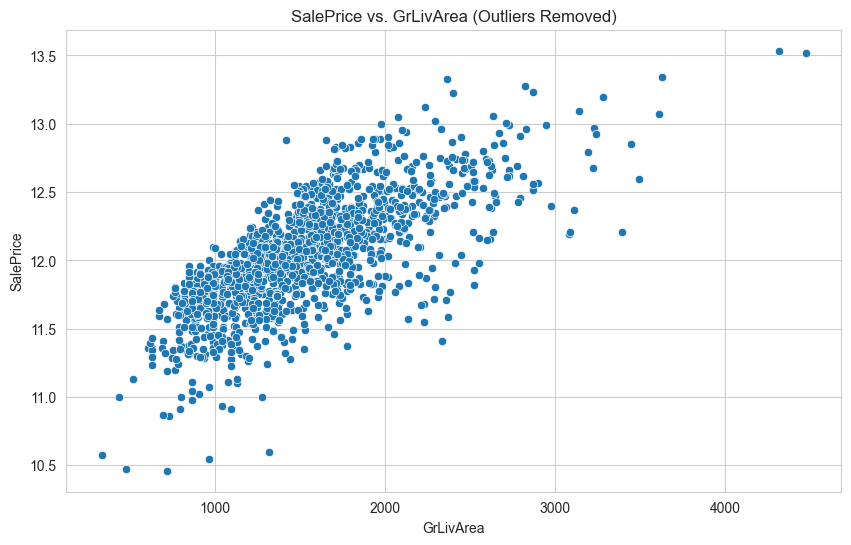

In [11]:
# Identify and remove the outliers
# From the plot, we see them at GrLivArea > 4000
outliers = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 13.0)].index

print(f"Found {len(outliers)} outliers based on GrLivArea and SalePrice. Removing them.")
train_df = train_df.drop(outliers)
train_df = train_df.reset_index(drop=True) # Reset the index

# Re-plot to confirm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('SalePrice vs. GrLivArea (Outliers Removed)')
plt.show()

In [12]:
train_df.select_dtypes(exclude=[np.number]).columns.tolist()


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

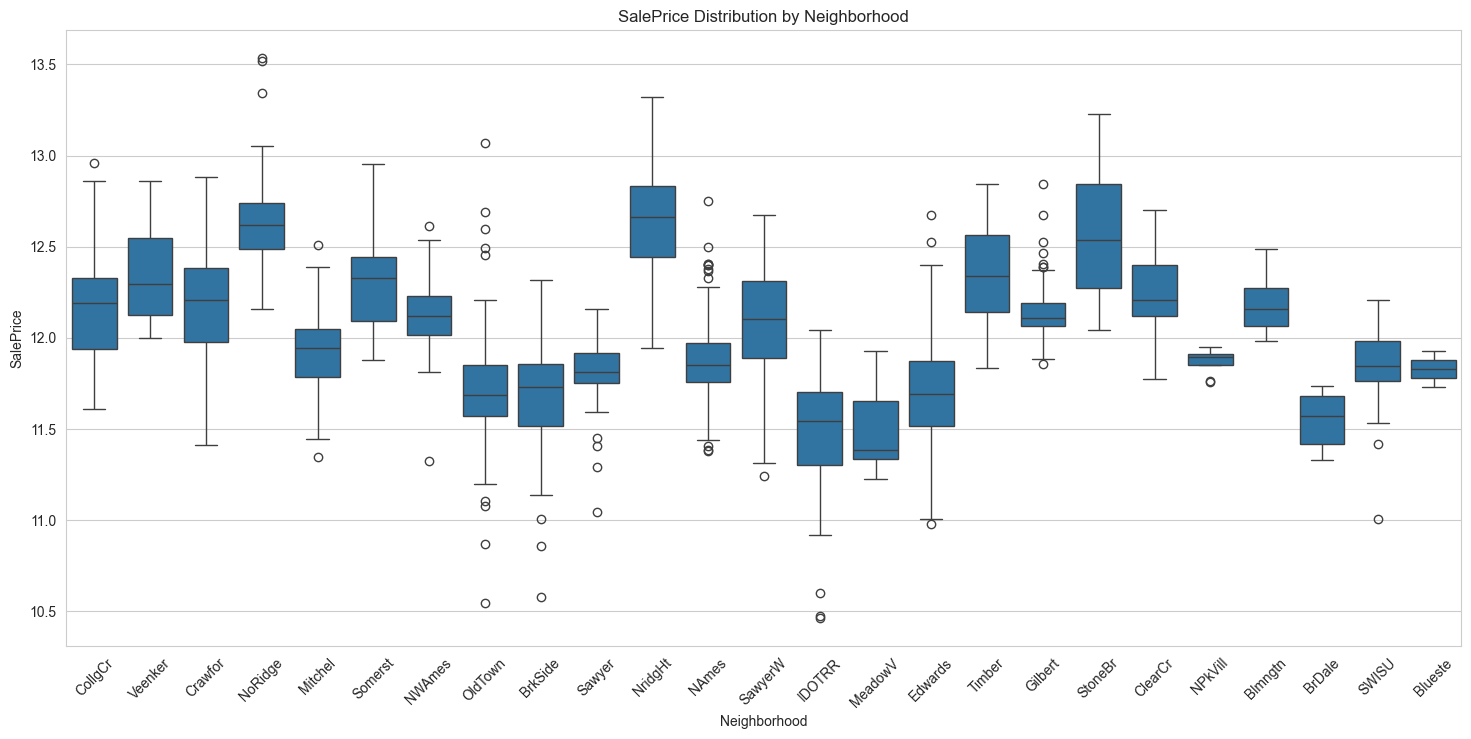

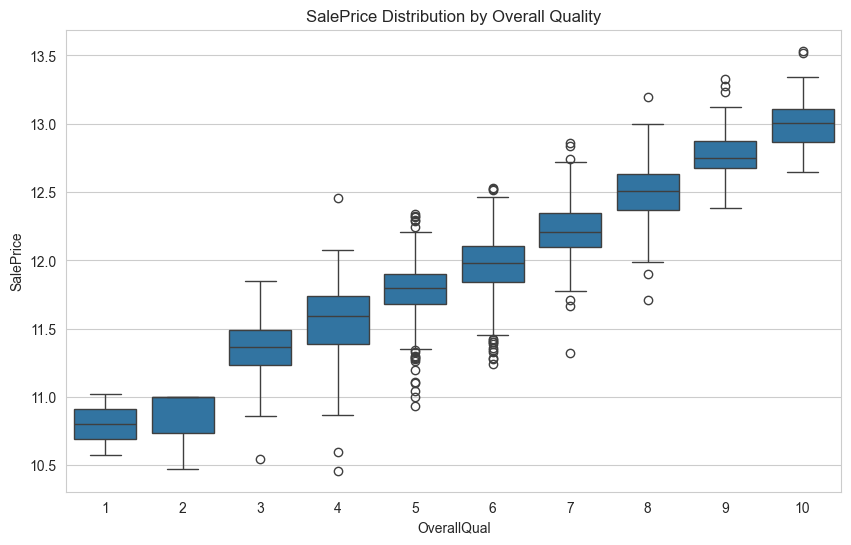

In [13]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.title('SalePrice Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('SalePrice Distribution by Overall Quality')
plt.show()

In [14]:

ntrain = train_df.shape[0]
ntest = test_df.shape[0]


y_train = train_df['SalePrice'].values
train_df = train_df.drop('SalePrice', axis=1)

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

print(f"Combined 'all_data' shape: {all_data.shape}")
print(f"(Train: {ntrain}, Test: {ntest})")

Combined 'all_data' shape: (2917, 79)
(Train: 1458, Test: 1459)


--- Features with Missing Data (and % missing) ---
PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
MasVnrType      60.541652
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageYrBlt      5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
Functional       0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
BsmtFinSF1       0.034282
Exterior2nd      0.034282
Exterior1st      0.034282
Electrical       0.034282
TotalBsmtSF      0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
KitchenQual      0.034282
GarageArea       0.034282
GarageCars       0.034282
SaleType         0.034282
dtype: float64


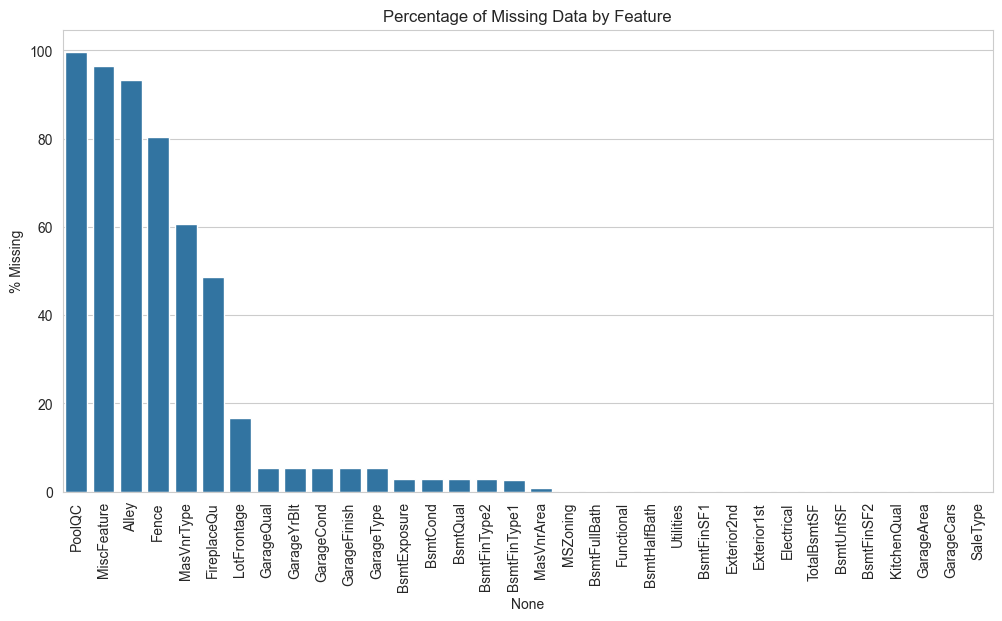

In [15]:
missing_percent = (all_data.isnull().sum()/ len(all_data)) * 100
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("--- Features with Missing Data (and % missing) ---")
print(missing_data)

# Visualize it
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Data by Feature')
plt.ylabel('% Missing')
plt.show()

In [16]:

features_fill_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

for col in features_fill_none:
    all_data[col] = all_data[col].fillna('None')

print(f"Filled 'NA' with 'None' for {len(features_fill_none)} categorical features.")

Filled 'NA' with 'None' for 14 categorical features.


In [17]:
# --- Group 2: NA means 0 (Numerical) ---
features_fill_zero = [
    'GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]

for col in features_fill_zero:
    all_data[col] = all_data[col].fillna(0)

print(f"Filled 'NA' with 0 for {len(features_fill_zero)} numerical features.")

Filled 'NA' with 0 for 9 numerical features.


In [18]:
# --- Group 3: NA means "Missing" (Fill with Mode) ---
features_fill_mode = [
    'MSZoning', 'Electrical', 'KitchenQual', 
    'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities'
]

for col in features_fill_mode:
    # .mode()[0] selects the first mode (in case there's a tie)
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

print(f"Filled 'NA' with mode for {len(features_fill_mode)} features.")

Filled 'NA' with mode for 7 features.


In [19]:
# --- Group 4: NA means "Missing" (Fill with Grouped Median) ---

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

print("Filled 'NA' for 'LotFrontage' using neighborhood median.")

Filled 'NA' for 'LotFrontage' using neighborhood median.


In [20]:

# Check for any remaining null values
remaining_missing = all_data.isnull().sum().sum()

if remaining_missing == 0:
    print("SUCCESS: All missing data has been handled.")
else:
    print(f"WARNING: There are still {remaining_missing} missing values.")

In [21]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [22]:
Neighborhood_missing = all_data['Neighborhood'].isnull().sum()
print(f"'Neighborhood' missing values count: {Neighborhood_missing}")

'Neighborhood' missing values count: 0


In [23]:
LotFrontage_missing = all_data['LotFrontage'].isnull().sum()
print(f"'LotFrontage' missing values count: {LotFrontage_missing}")

'LotFrontage' missing values count: 0


In [24]:
new_missing_percent = (all_data.isnull().sum()/ len(all_data)) * 100
new_missing_data = new_missing_percent[new_missing_percent > 0].sort_values(ascending=False)

print("--- Features with Missing Data (and % missing) ---")
print(new_missing_data)

--- Features with Missing Data (and % missing) ---
MasVnrType    60.541652
MasVnrArea     0.788481
Functional     0.068564
dtype: float64


In [25]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

print("Imputed 'MasVnrType' with 'None'.")

Imputed 'MasVnrType' with 'None'.


In [26]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') # from the data description we assume 'Typ' is the default
print("Imputed 'Functional' with 'Typ'.")
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
print("Imputed 'MasVnrArea' with 0.")

Imputed 'Functional' with 'Typ'.
Imputed 'MasVnrArea' with 0.


In [27]:

remaining_missing = all_data.isnull().sum().sum()

if remaining_missing == 0:
    print("SUCCESS: All missing data has been handled.")
else:
    print(f"WARNING: There are still {remaining_missing} missing values. Review the corrected Cell 10.")
    

SUCCESS: All missing data has been handled.

In [28]:
train_df.select_dtypes(include=[np.number]).columns.tolist()


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [29]:
# --- 13. Feature Engineering

In [30]:
all_data[all_data['GarageYrBlt'] < 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [31]:
"""all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                          all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['EnclosedPorch'] +
                             all_data['3SsnPorch'] + all_data['ScreenPorch']+ all_data['WoodDeckSF'])
# 4. House Age and Remodel Age
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']"""


"all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']\nall_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +\n                          all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))\nall_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['EnclosedPorch'] +\n                             all_data['3SsnPorch'] + all_data['ScreenPorch']+ all_data['WoodDeckSF'])\n# 4. House Age and Remodel Age\nall_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']\nall_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']"

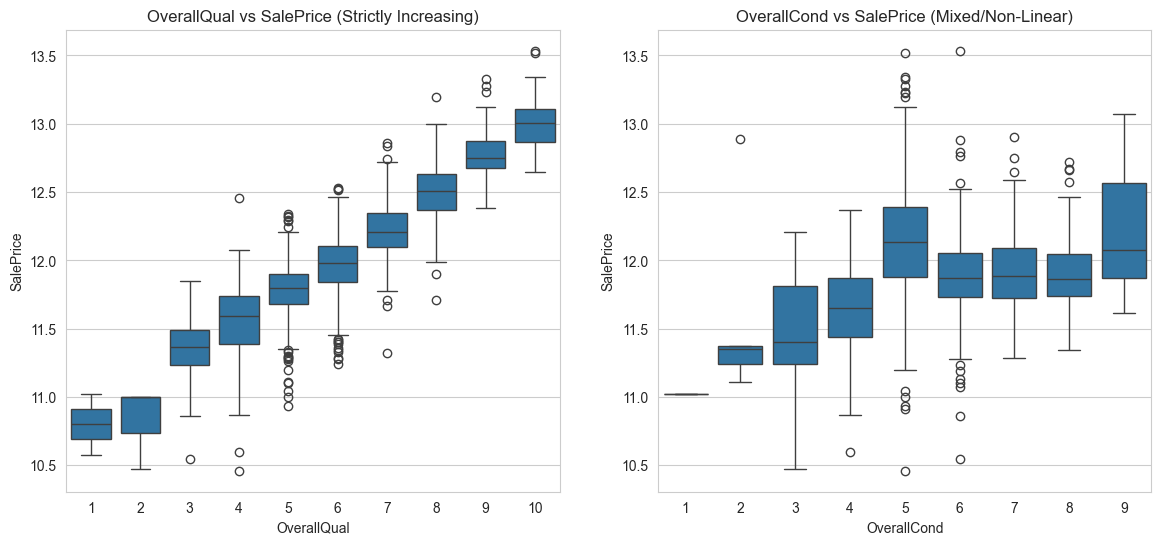

ValueError: Could not interpret value `SalePrice` for `y`. An entry with this name does not appear in `data`.

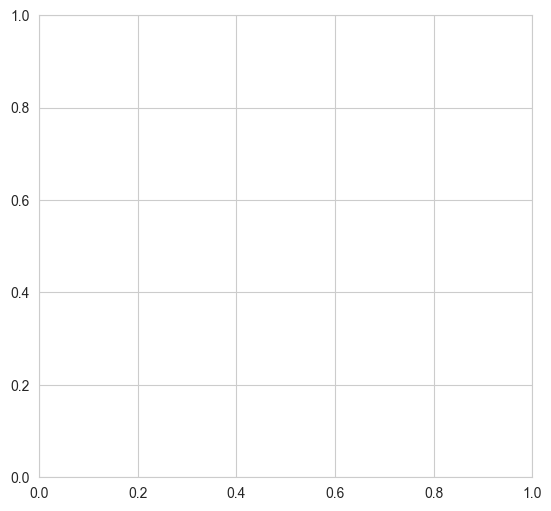

In [ ]:
# --- Diagnostic: Why OverallQual is a number but OverallCond is a string ---

# 1. Reconstruct a temporary dataframe for plotting
# We take the training part of our processed data
ntrain = len(y_train) 
plot_df = all_data[:ntrain].copy()
# Add the target variable back just for this chart
plot_df['SalePrice'] = y_train 

plt.figure(figsize=(14, 6))

# Plot 1: OverallQual (Strictly Linear - Keep as Number)
# Note: OverallQual is likely a number in plot_df, which is good.
plt.subplot(1, 2, 1)
sns.boxplot(x='OverallQual', y='SalePrice', data=plot_df)
plt.title('OverallQual vs SalePrice (Strictly Increasing)')

# Plot 2: OverallCond (Non-Linear / Weird - Treat as Category)
# Note: OverallCond might be a string now if you ran Cell 12. That's fine!
plt.subplot(1, 2, 2)
sns.boxplot(x='OverallCond', y='SalePrice', data=plot_df)
plt.title('OverallCond vs SalePrice (Mixed/Non-Linear)')

plt.show()
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)


In [34]:
# --- 13. Feature Engineering 
# 1. Total Square Footage
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# 2. Total Bathrooms
all_data['TotalBath'] = (all_data['FullBath'] + 0.5 * all_data['HalfBath'] +
                         all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath'])

# 3. Total Porch/Deck Square Feet
all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                            all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                            all_data['WoodDeckSF'])

# 4. House Age and Remodel Age
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# 5. Garage Age
all_data['GarageAge'] = all_data.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] > 0 else 0,
    axis=1
) # because GarageYrBlt can be 0 if there is no garage 

# 6. Simple binary features
all_data['WasRemodeled'] = (all_data['RemodAge'] != all_data['HouseAge']).astype(int)
all_data['IsNewBuild'] = (all_data['HouseAge'] == 0).astype(int)

print("Created 8 new features (TotalSF, TotalBath, TotalPorchSF, HouseAge, RemodAge, GarageAge, WasRemodeled, IsNewBuild).")

Created 8 new features (TotalSF, TotalBath, TotalPorchSF, HouseAge, RemodAge, GarageAge, WasRemodeled, IsNewBuild).


In [35]:
# --- 12. Correcting Feature Data Types ---

features_to_str = [
    'MSSubClass', 'OverallCond', 'YrSold', 'MoSold'
]

for col in features_to_str:
    all_data[col] = all_data[col].astype(str)

print(f"Converted {len(features_to_str)} numerical features to string type.")

Converted 4 numerical features to string type.


In [36]:
# --- 14. Transforming Skewed Numerical Features ---

# 1. Identify all numerical features (excluding our new binary ones)
numerical_features = all_data.select_dtypes(include=[np.number]).columns
binary_features = ['WasRemodeled', 'IsNewBuild']
numerical_features = [f for f in numerical_features if f not in binary_features]

# 2. Calculate skewness for each
from scipy.stats import skew
skewness = all_data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# 3. Define a threshold (0.75) and apply log1p transform
skewed_features = skewness[abs(skewness) > 0.75].index

print(f"Found {len(skewed_features)} skewed numerical features. Applying log1p transform...")

for col in skewed_features:
    all_data[col] = np.log1p(all_data[col])

print("Skewness transformation complete.")

Found 22 skewed numerical features. Applying log1p transform...
Skewness transformation complete.


In [37]:
# --- 15. One-Hot Encoding ---

all_data = pd.get_dummies(all_data)

print(f"New shape after One-Hot Encoding: {all_data.shape}")
# You should see the column count jump from ~80 to ~300+

New shape after One-Hot Encoding: (2917, 347)


In [38]:
# --- 16. Final Data Split ---

# 1. Split the data back into train and test sets
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

# 2. Double check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}") # Remember y_train is our log(SalePrice)

# Professional Sanity Check:
# X_train and y_train must have the same number of rows!
assert X_train.shape[0] == y_train.shape[0]
print("Sanity check passed: Train features and target have matching rows.")

X_train shape: (1458, 347)
X_test shape: (1459, 347)
y_train shape: (1458,)
Sanity check passed: Train features and target have matching rows.


In [39]:
# --- 17. Save Processed Data ---
import os

# 1. Create a 'processed' directory if it doesn't exist
# We go up one level to root, then into data/
output_dir = '../data/processed'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 2. Save X_train and X_test
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)

# 3. Save y_train
# We convert the numpy array back to a DataFrame so we can save it with a header
pd.DataFrame(y_train, columns=['SalePrice']).to_csv(f'{output_dir}/y_train.csv', index=False)

# 4. Save the Test IDs (we need these for the final submission file!)
test_ID.to_csv(f'{output_dir}/test_ID.csv', index=False, header=['Id'])

print(f"Data saved successfully to {output_dir}")

Data saved successfully to ../data/processed
